In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [69]:
# Load the dataset
df = pd.read_csv('/content/data.csv')

# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)


In [70]:
# Split the dataset into features (X) and target (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Check for NaN values in X before scaling
print("NaN values in X before scaling:")
print(X.isnull().sum())

NaN values in X before scaling:
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [71]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check for NaN values after scaling
print("\nNaN values in X after scaling:")
print(np.isnan(X_scaled).sum())


NaN values in X after scaling:
0


In [72]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [73]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
# Evaluate the model
y_pred = model.predict(X_test)
print('\nModel Evaluation:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[70  1]
 [ 1 42]]


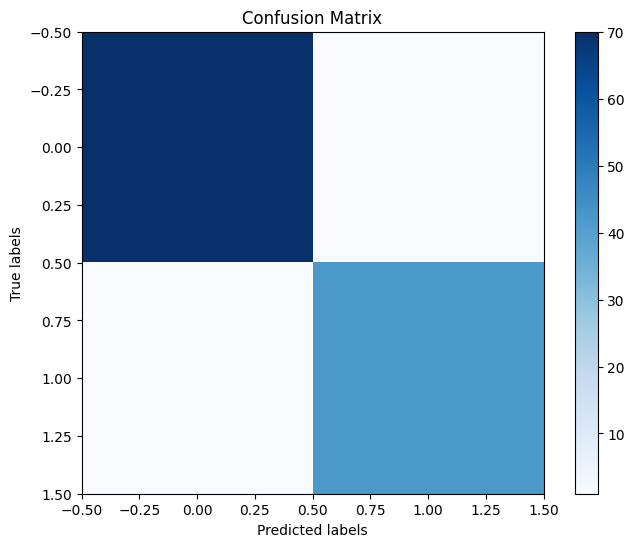

In [75]:
# Visualize the results using a confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

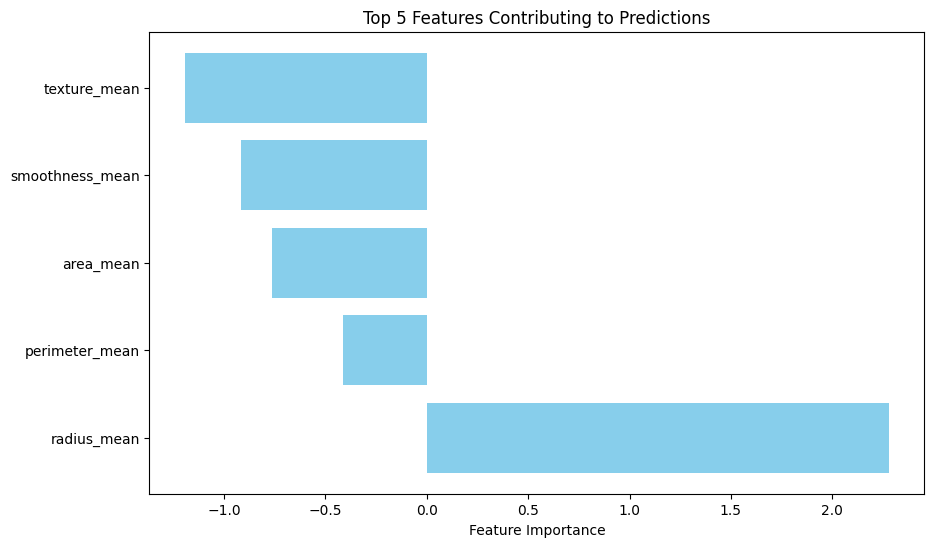

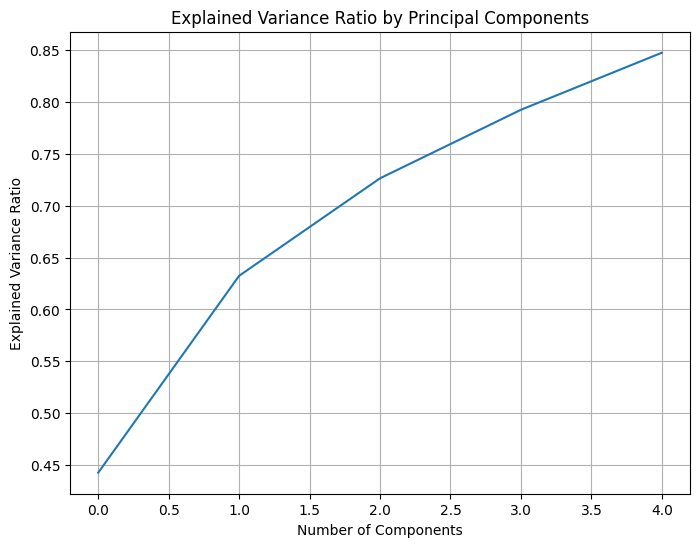

In [76]:
# Feature importance
coefficients = model.coef_[0]
features = X.columns
sorted_indices = np.argsort(coefficients)
top_features = features[sorted_indices][-5:]  # Top 5 features contributing to predictions

plt.figure(figsize=(10, 6))
plt.barh(top_features, coefficients[sorted_indices][-5:], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Features Contributing to Predictions')
plt.gca().invert_yaxis()
plt.show()

# Explained variance ratio by principal components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()